<a href="https://colab.research.google.com/github/dhanhyuti/assignment/blob/main/carprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Count of cars per doornumber:
 doornumber
four    115
two      90
Name: count, dtype: int64

citympg, carlength, and price where carlength is between 100 to 150:
     citympg  carlength   price
18       47      141.1  5151.0
30       49      144.6  6479.0
31       31      144.6  6855.0
32       38      150.0  5399.0
33       30      150.0  6529.0
34       30      150.0  7129.0

Records of cars where cylindernumber is either four or six:
      symboling                   CarName fueltype aspiration doornumber  \
0            3        alfa-romero giulia      gas        std        two   
1            3       alfa-romero stelvio      gas        std        two   
2            1  alfa-romero Quadrifoglio      gas        std        two   
3            2               audi 100 ls      gas        std       four   
10           2                  bmw 320i      gas        std        two   
..         ...                       ...      ...        ...        ...   
200         -1           volvo 1

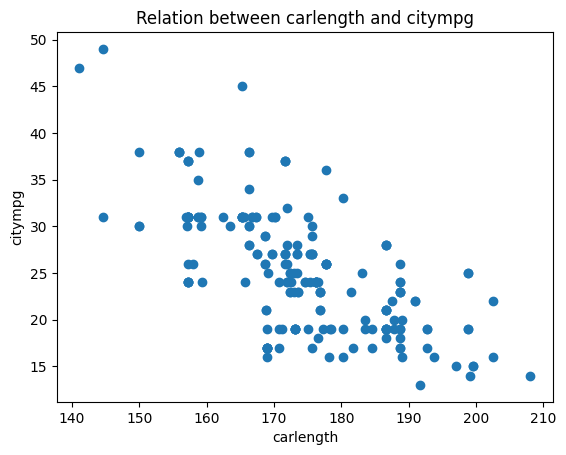


Records of cars with outlier price:
     symboling                          CarName fueltype aspiration doornumber  \
16          0                           bmw x5      gas        std        two   
73          0            buick century special      gas        std       four   
74          1  buick regal sport coupe (turbo)      gas        std        two   

    carbody drivewheel enginelocation  wheelbase  carlength  ...  enginesize  \
16    sedan        rwd          front      103.5      193.8  ...         209   
73    sedan        rwd          front      120.9      208.1  ...         308   
74  hardtop        rwd          front      112.0      199.2  ...         304   

    fuelsystem  boreratio stroke compressionratio  horsepower peakrpm  \
16        mpfi       3.62   3.39              8.0         182    5400   
73        mpfi       3.80   3.35              8.0         184    4500   
74        mpfi       3.80   3.35              8.0         184    4500   

    citympg  highwaympg

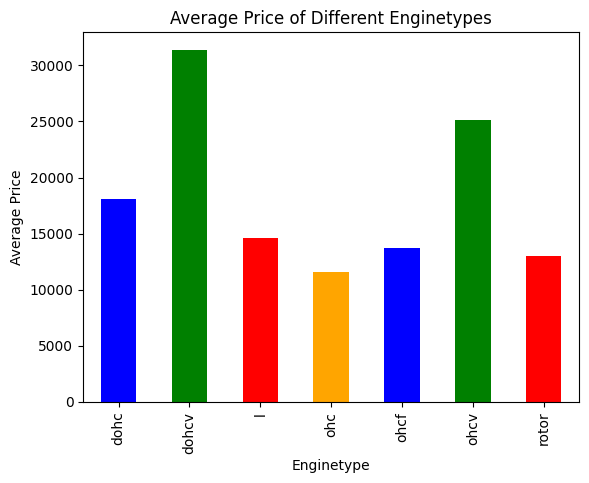

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# 1. Load the dataset and drop car_ID
car_data = pd.read_csv('Practical 6_CarPrice_Assignment.csv')
car_data = car_data.drop('car_ID', axis=1)

# 2. Print the count of cars as per their "doornumber"
print("\nCount of cars per doornumber:\n", car_data['doornumber'].value_counts())

# 3. Print citympg, carlength, and price where carlength is between 100 to 150
filtered_data = car_data[(car_data['carlength'] >= 100) & (car_data['carlength'] <= 150)][['citympg', 'carlength', 'price']]
print("\ncitympg, carlength, and price where carlength is between 100 to 150:\n", filtered_data)

# 4. Print records of cars where "cylindernumber" is either four or six
filtered_data = car_data[car_data['cylindernumber'].isin(['four', 'six'])]
print("\nRecords of cars where cylindernumber is either four or six:\n", filtered_data)

# 5. Create separate data frames (numdf, catdf)
numdf = car_data.select_dtypes(include=['number'])
catdf = car_data.select_dtypes(include=['object'])

# 6. Create a correlation matrix of the numeric dataframe (numdf)
correlation_matrix = numdf.corr()
print("\nCorrelation matrix of numdf:\n", correlation_matrix)

# 7. Visualize the relation between "carlength" and "citympg"
plt.scatter(car_data['carlength'], car_data['citympg'])
plt.title('Relation between carlength and citympg')
plt.xlabel('carlength')
plt.ylabel('citympg')
plt.show()

# Inference: (Write your observations from the plot here)

# 8. Calculate outliers for the column "price"
z_scores = np.abs(stats.zscore(car_data['price']))
outliers = car_data[(z_scores > 3)]  # Using a threshold of 3 standard deviations

# 9. Filter records of cars with outlier price
outlier_price_cars = car_data[car_data['price'].isin(outliers['price'])]
print("\nRecords of cars with outlier price:\n", outlier_price_cars)

# 10. Bar plot comparing average price of different enginetypes
enginetype_avg_price = car_data.groupby('enginetype')['price'].mean()
enginetype_avg_price.plot(kind='bar', color=['blue', 'green', 'red', 'orange'])  # Customize colors
plt.title('Average Price of Different Enginetypes')
plt.xlabel('Enginetype')
plt.ylabel('Average Price')
plt.show()
